In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import numpy as np

# Clean data path
clean_path = "/content/drive/MyDrive/Colab Notebooks/retail_forecasting_sequences"

X_train_clean = np.load(f"{clean_path}/X_train_reshaped.npy")
y_train_clean = np.load(f"{clean_path}/y_train_reshaped.npy")
X_val_clean   = np.load(f"{clean_path}/X_val_reshaped.npy")
y_val_clean   = np.load(f"{clean_path}/y_val_reshaped.npy")
X_test_clean  = np.load(f"{clean_path}/X_test_reshaped.npy")
y_test_clean  = np.load(f"{clean_path}/y_test_reshaped.npy")

print("CLEAN DATA")
print("Train:", X_train_clean.shape, y_train_clean.shape)
print("Val:  ", X_val_clean.shape, y_val_clean.shape)
print("Test: ", X_test_clean.shape, y_test_clean.shape)

# Noisy data path
noisy_path = f"{clean_path}/retail_forecasting_sequences_noisy"

X_train_noisy = np.load(f"{noisy_path}/X_train_noisy_reshaped.npy")
y_train_noisy = np.load(f"{noisy_path}/y_train_noisy_reshaped.npy")
X_val_noisy   = np.load(f"{noisy_path}/X_val_noisy_reshaped.npy")
y_val_noisy   = np.load(f"{noisy_path}/y_val_noisy_reshaped.npy")
X_test_noisy  = np.load(f"{noisy_path}/X_test_noisy_reshaped.npy")
y_test_noisy  = np.load(f"{noisy_path}/y_test_noisy_reshaped.npy")

print("\n NOISY DATA")
print("Train:", X_train_noisy.shape, y_train_noisy.shape)
print("Val:  ", X_val_noisy.shape, y_val_noisy.shape)
print("Test: ", X_test_noisy.shape, y_test_noisy.shape)


CLEAN DATA
Train: (202883, 12, 19) (202883, 6, 19)
Val:   (43475, 12, 19) (43475, 6, 19)
Test:  (43475, 12, 19) (43475, 6, 19)

 NOISY DATA
Train: (202883, 12, 19) (202883, 6, 19)
Val:   (43474, 12, 19) (43474, 6, 19)
Test:  (43476, 12, 19) (43476, 6, 19)


In [77]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def get_loaders(X, y):
    return DataLoader(TensorDataset(torch.tensor(X), torch.tensor(y)), batch_size=128)

def flatten_loader(loader):
    X_flat, y_all = [], []
    for x, y in loader:
        X_flat.append(x.view(x.size(0), -1).float())
        y_all.append(y.view(y.size(0), -1).float())
    return torch.cat(X_flat), torch.cat(y_all)

# CLEAN
train_loader = get_loaders(X_train_clean, y_train_clean)
val_loader   = get_loaders(X_val_clean, y_val_clean)
test_loader  = get_loaders(X_test_clean, y_test_clean)

X_train_flat, y_train_flat = flatten_loader(train_loader)
X_val_flat, y_val_flat     = flatten_loader(val_loader)
X_test_flat, y_test_flat   = flatten_loader(test_loader)

print("Flattened CLEAN:", X_train_flat.shape, y_train_flat.shape)

# NOISY
train_loader = get_loaders(X_train_noisy, y_train_noisy)
val_loader   = get_loaders(X_val_noisy, y_val_noisy)
test_loader  = get_loaders(X_test_noisy, y_test_noisy)

X_train_flat_noisy, y_train_flat_noisy = flatten_loader(train_loader)
X_val_flat_noisy, y_val_flat_noisy     = flatten_loader(val_loader)
X_test_flat_noisy, y_test_flat_noisy   = flatten_loader(test_loader)

print("Flattened NOISY:", X_train_flat_noisy.shape, y_train_flat_noisy.shape)


Flattened CLEAN: torch.Size([202883, 228]) torch.Size([202883, 114])
Flattened NOISY: torch.Size([202883, 228]) torch.Size([202883, 114])



Training Linear CLEAN
[Linear CLEAN] Epoch  1 | Train Loss: 0.2760 | Val Loss: 0.2380 | R²: -2.5149
[Linear CLEAN] Epoch  2 | Train Loss: 0.2185 | Val Loss: 0.1856 | R²: -1.7145
[Linear CLEAN] Epoch  3 | Train Loss: 0.1744 | Val Loss: 0.1480 | R²: -1.1424
[Linear CLEAN] Epoch  4 | Train Loss: 0.1417 | Val Loss: 0.1226 | R²: -0.7578
[Linear CLEAN] Epoch  5 | Train Loss: 0.1185 | Val Loss: 0.1072 | R²: -0.5243
[Linear CLEAN] Epoch  6 | Train Loss: 0.1029 | Val Loss: 0.0994 | R²: -0.4062
[Linear CLEAN] Epoch  7 | Train Loss: 0.0932 | Val Loss: 0.0970 | R²: -0.3688
[Linear CLEAN] Epoch  8 | Train Loss: 0.0877 | Val Loss: 0.0979 | R²: -0.3803
[Linear CLEAN] Epoch  9 | Train Loss: 0.0850 | Val Loss: 0.1005 | R²: -0.4145
[Linear CLEAN] Epoch 10 | Train Loss: 0.0838 | Val Loss: 0.1035 | R²: -0.4527
[Linear CLEAN] Epoch 11 | Train Loss: 0.0832 | Val Loss: 0.1062 | R²: -0.4837
[Linear CLEAN] Epoch 12 | Train Loss: 0.0827 | Val Loss: 0.1070 | R²: -0.4902
[Linear CLEAN] Epoch 13 | Train Loss: 0.0

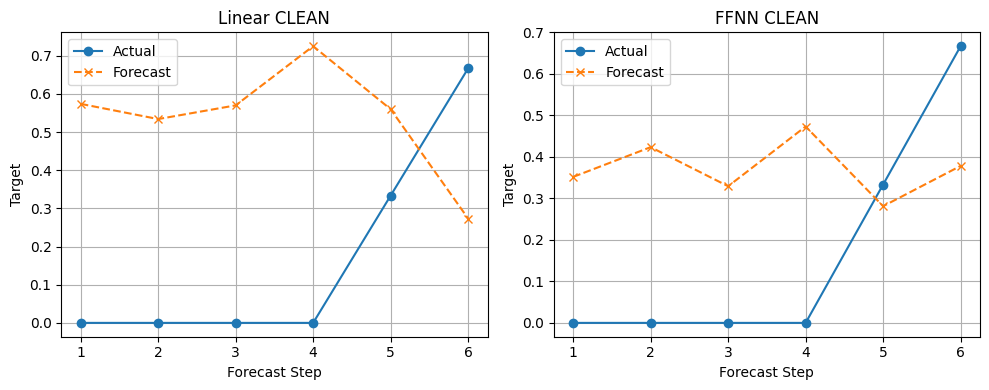


Training Linear NOISY
[Linear NOISY] Epoch  1 | Train Loss: 0.3774 | Val Loss: 0.2732 | R²: -11.2035
[Linear NOISY] Epoch  2 | Train Loss: 0.2768 | Val Loss: 0.1975 | R²: -7.5631
[Linear NOISY] Epoch  3 | Train Loss: 0.2007 | Val Loss: 0.1442 | R²: -4.9941
[Linear NOISY] Epoch  4 | Train Loss: 0.1466 | Val Loss: 0.1096 | R²: -3.3207
[Linear NOISY] Epoch  5 | Train Loss: 0.1107 | Val Loss: 0.0895 | R²: -2.3416
[Linear NOISY] Epoch  6 | Train Loss: 0.0890 | Val Loss: 0.0798 | R²: -1.8589
[Linear NOISY] Epoch  7 | Train Loss: 0.0773 | Val Loss: 0.0768 | R²: -1.6941
[Linear NOISY] Epoch  8 | Train Loss: 0.0723 | Val Loss: 0.0778 | R²: -1.6990
[Linear NOISY] Epoch  9 | Train Loss: 0.0712 | Val Loss: 0.0804 | R²: -1.7653
[Linear NOISY] Epoch 10 | Train Loss: 0.0719 | Val Loss: 0.0833 | R²: -1.8290
[Linear NOISY] Epoch 11 | Train Loss: 0.0731 | Val Loss: 0.0858 | R²: -1.8624
[Linear NOISY] Epoch 12 | Train Loss: 0.0741 | Val Loss: 0.0864 | R²: -1.8486
[Linear NOISY] Epoch 13 | Train Loss: 0.

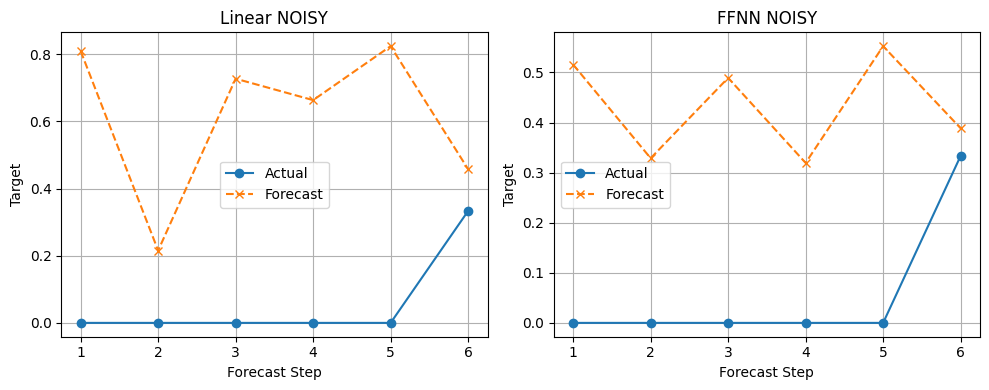

In [78]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error, median_absolute_error
import os


device = "cuda" if torch.cuda.is_available() else "cpu"

# Evaluation metrics
def evaluate_all(y_true, y_pred):
    metrics = {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "EVS": explained_variance_score(y_true, y_pred),
        "MSLE": mean_squared_log_error(np.clip(y_true, 0, None), np.clip(y_pred, 0, None)),
        "MAXE": np.max(np.abs(y_true - y_pred)),
        "MEDAE": median_absolute_error(y_true, y_pred)
    }
    print("\nEvaluation Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    return metrics

# Feedforward Neural Network
class FFNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    def forward(self, x):
        return self.net(x)

# Forecast vs Actual Plot
def plot_prediction(preds, true, output_dim, sample_idx=0, target_index=0):
    for i in range(1, output_dim + 1):
        if output_dim % i == 0:
            output_seq_len = i
            num_y_targets = output_dim // i
            if num_y_targets == 19:
                break
    pred_sample = preds[sample_idx].reshape(output_seq_len, num_y_targets)[:, target_index]
    true_sample = true[sample_idx].reshape(output_seq_len, num_y_targets)[:, target_index]

    plt.plot(range(1, output_seq_len + 1), true_sample, marker='o', label='Actual')
    plt.plot(range(1, output_seq_len + 1), pred_sample, marker='x', label='Forecast', linestyle='--')
    plt.xlabel("Forecast Step")
    plt.ylabel("Target")
    plt.grid(True)
    plt.legend()

# Training + Evaluation Routine
def train_and_evaluate(name, X_train, y_train, X_val, y_val, X_test, y_test):
    input_dim, output_dim = X_train.shape[1], y_train.shape[1]
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_val, y_val     = X_val.to(device), y_val.to(device)
    X_test, y_test   = X_test.to(device), y_test.to(device)

    results = {}
    criterion = nn.MSELoss()

    # ========== Linear ==========
    print(f"\nTraining Linear {name}")
    linear = nn.Linear(input_dim, output_dim).to(device)
    opt = torch.optim.AdamW(linear.parameters(), lr=1e-3, weight_decay=1e-2)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=3)

    best_val_loss = float("inf")
    for epoch in range(1, 21):
        linear.train()
        opt.zero_grad()
        output = linear(X_train)
        train_loss = criterion(output, y_train)
        train_loss.backward()
        opt.step()

        linear.eval()
        with torch.no_grad():
            val_output = linear(X_val)
            val_loss = criterion(val_output, y_val).item()
            val_r2 = r2_score(y_val.cpu().numpy(), val_output.cpu().numpy())
        scheduler.step(val_loss)

        print(f"[Linear {name}] Epoch {epoch:2d} | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss:.4f} | R²: {val_r2:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(linear.state_dict(), f"best_linear_{name.lower()}.pth")

    linear.load_state_dict(torch.load(f"best_linear_{name.lower()}.pth"))
    linear.eval()
    with torch.no_grad():
        pred = linear(X_test).cpu().numpy()
        true = y_test.cpu().numpy()
    results[f"Linear {name}"] = evaluate_all(true, pred)

    # ========== FFNN ==========
    print(f"\nTraining FFNN {name}")
    ffnn = FFNN(input_dim, output_dim).to(device)
    opt = torch.optim.AdamW(ffnn.parameters(), lr=1e-3, weight_decay=1e-2)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=3)

    best_val_loss = float("inf")
    for epoch in range(1, 21):
        ffnn.train()
        opt.zero_grad()
        output = ffnn(X_train)
        train_loss = criterion(output, y_train)
        train_loss.backward()
        opt.step()

        ffnn.eval()
        with torch.no_grad():
            val_output = ffnn(X_val)
            val_loss = criterion(val_output, y_val).item()
            val_r2 = r2_score(y_val.cpu().numpy(), val_output.cpu().numpy())
        scheduler.step(val_loss)

        print(f"[FFNN  {name}] Epoch {epoch:2d} | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss:.4f} | R²: {val_r2:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(ffnn.state_dict(), f"best_ffnn_{name.lower()}.pth")

    ffnn.load_state_dict(torch.load(f"best_ffnn_{name.lower()}.pth"))
    ffnn.eval()
    with torch.no_grad():
        pred2 = ffnn(X_test).cpu().numpy()
        true2 = y_test.cpu().numpy()
    results[f"FFNN {name}"] = evaluate_all(true2, pred2)

    # ========== Visualization ==========
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot_prediction(pred, true, output_dim)
    plt.title(f"Linear {name}")
    plt.subplot(1, 2, 2)
    plot_prediction(pred2, true2, output_dim)
    plt.title(f"FFNN {name}")
    plt.tight_layout()
    plt.show()

    return results

results_clean = train_and_evaluate("CLEAN", X_train_flat, y_train_flat, X_val_flat, y_val_flat, X_test_flat, y_test_flat)
results_noisy = train_and_evaluate("NOISY", X_train_flat_noisy, y_train_flat_noisy, X_val_flat_noisy, y_val_flat_noisy, X_test_flat_noisy, y_test_flat_noisy)


In [79]:
import os

model_files = [f for f in os.listdir() if f.endswith(".pth")]
print("Saved model files:", model_files)

Saved model files: ['best_linear_clean.pth', 'best_ffnn_clean.pth', 'best_linear_noisy.pth', 'best_ffnn_noisy.pth']



best_linear_clean.pth
  Mean:      0.004575
  Std:       0.038094
  Min:       -0.070960
  Max:       0.072799
  Size (KB): 103.46

best_ffnn_clean.pth
  Mean:      0.000884
  Std:       0.040048
  Min:       -0.090930
  Max:       0.101186
  Size (KB): 417.71

best_linear_noisy.pth
  Mean:      0.004722
  Std:       0.038023
  Min:       -0.069822
  Max:       0.072781
  Size (KB): 103.46

best_ffnn_noisy.pth
  Mean:      0.000828
  Std:       0.039917
  Min:       -0.093858
  Max:       0.104105
  Size (KB): 417.71


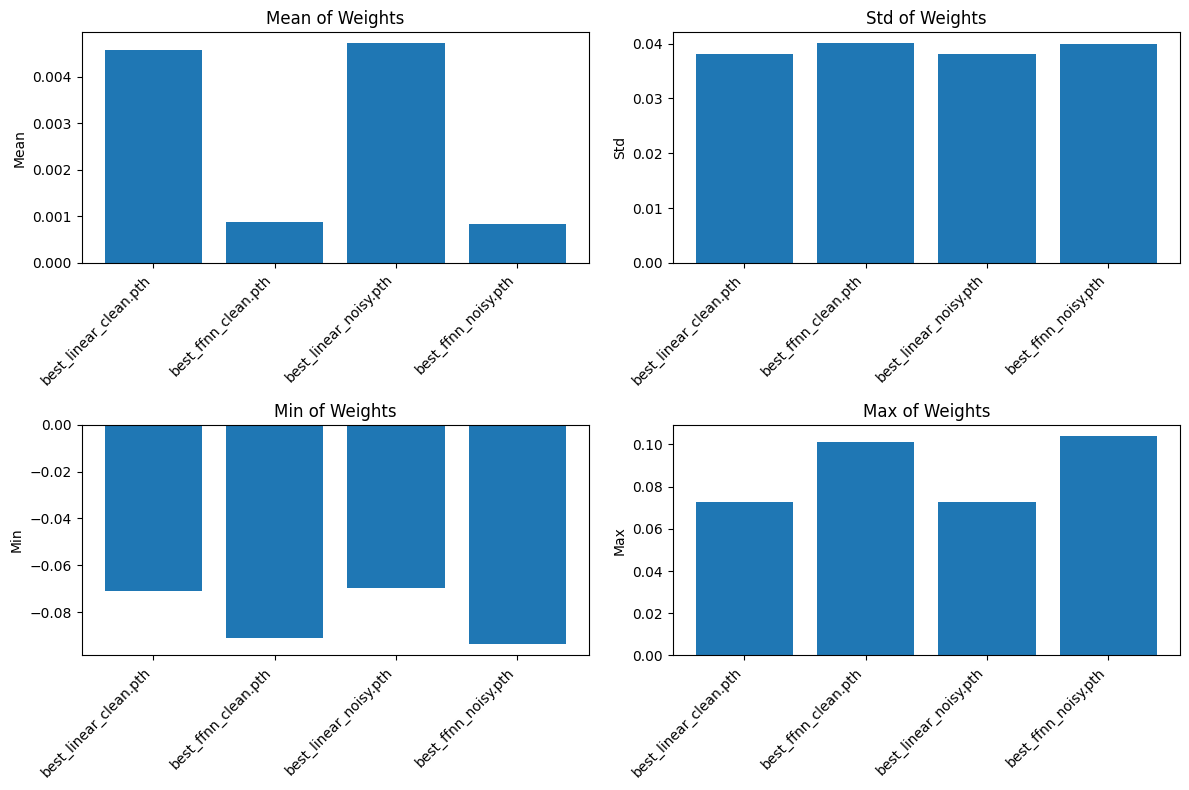

In [80]:
import torch
import os
import matplotlib.pyplot as plt

model_paths = [
    'best_linear_clean.pth',
    'best_ffnn_clean.pth',
    'best_linear_noisy.pth',
    'best_ffnn_noisy.pth'
]


stats = {"Model": [], "Mean": [], "Std": [], "Min": [], "Max": [], "Size_KB": []}

def print_model_stats(path):
    state_dict = torch.load(path, map_location='cpu')
    all_weights = torch.cat([w.flatten() for w in state_dict.values()])
    print(f"\n{path}")
    print(f"  Mean:      {all_weights.mean().item():.6f}")
    print(f"  Std:       {all_weights.std().item():.6f}")
    print(f"  Min:       {all_weights.min().item():.6f}")
    print(f"  Max:       {all_weights.max().item():.6f}")
    print(f"  Size (KB): {os.path.getsize(path)/1024:.2f}")

for path in model_paths:
    print_model_stats(path)

for path in model_paths:
    state_dict = torch.load(path, map_location='cpu')
    all_weights = torch.cat([w.flatten() for w in state_dict.values()])
    stats["Model"].append(path)
    stats["Mean"].append(all_weights.mean().item())
    stats["Std"].append(all_weights.std().item())
    stats["Min"].append(all_weights.min().item())
    stats["Max"].append(all_weights.max().item())
    stats["Size_KB"].append(os.path.getsize(path) / 1024)

metrics = ["Mean", "Std", "Min", "Max"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, metric in enumerate(metrics):
    ax = axes[i // 2][i % 2]
    ax.bar(stats["Model"], stats[metric])
    ax.set_title(f"{metric} of Weights")
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(stats["Model"])))
    ax.set_xticklabels(stats["Model"], rotation=45, ha='right')

plt.tight_layout()
plt.show()


Overall, the Feedforward Neural Network (FFNN) tends to outperform the Linear model across most evaluation metrics, especially in terms of error reduction (for example, lower MSE, MAE, RMSE) on both CLEAN and NOISY datasets. While neither model achieves high R squared scores, FFNN consistently provides slightly better predictive performance, suggesting its greater capacity to capture nonlinear patterns in the retail time series data.

However, despite the relative improvement, the negative R squared values indicate that both models are still underfitting the data. This suggests that the current modeling archictectures, including FFNN and Linear regression, may not be well suited for the complex and high variance structure of our retail and warehouse demand dataset. In particular, factors such as strong temporal dependencies, categorical heterogeneity (for example, product and store IDs), and seasonality may require more specialized architectures such as recurrent models (for example, LSTM or GRU) or attention based transformers that are better equipped to model long term temporal patterns.